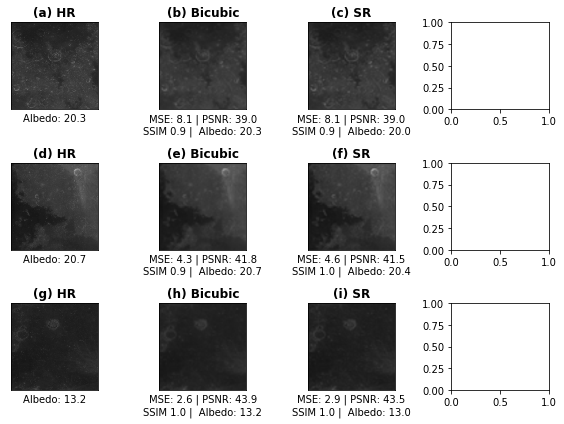

In [23]:
import numpy as np
import math
from skimage import io
from skimage.measure import compare_ssim
import matplotlib.pyplot as plt

hr_dir = '/home/alice/alice/masters_project/MoonSRCNN-master/dataset2/validation/'
bic_dir = '/home/alice/alice/masters_project/MoonSRCNN-master/dataset2/val_bic/'
sr_dir = '/home/alice/alice/masters_project/MoonSRCNN-master/dataset2/val_sr/'

dest_dir = '/home/alice/alice/masters_project/MoonSRCNN-master/outputs/'


sample_img = ['0000_hr.png', '0006_hr.png', '0012_hr.png']

def calc_mse(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    return mse

def calc_psnr(img1, img2):

    m = calc_mse(img1, img2)
    if m == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(m))

def calc_ssim(img1, img2):
    s = compare_ssim(img1, img2, multichannel=True)
    return s

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def calc_albedo(img):
    img = rgb2gray(img)/255 * 100
    return np.mean(img)

fig, axes = plt.subplots(3,3, figsize=(8,6))

letters = ['a','b','c','d','e','f','g','h', 'i']

for i,f in enumerate(sample_img):
   
    image_sr = io.imread(sr_dir + 'sr_'+ f)
    image_hr = io.imread(hr_dir + f)
    image_bic = io.imread(bic_dir + f.replace('.png', '_lr.png'))

    ax = axes[i,0]

  
    ax.set_title('({:s}) HR'.format(letters[i*3]), fontweight="bold")
    
    albedo = calc_albedo(image_hr)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image_hr)

    ax.set_xlabel('Albedo: {:.1f}'
                .format(albedo))



    ax = axes[i,1]
    ax.set_title('({:s}) Bicubic'.format(letters[i*3+1]), fontweight="bold")
    albedo = calc_albedo(image_bic)
    mse = calc_mse(image_hr, image_bic)
    psnr = calc_psnr(image_hr, image_bic)
    ssim = calc_ssim(image_hr, image_bic)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image_bic)

    ax.set_xlabel('MSE: {:.1f} | PSNR: {:.1f}'
                '\nSSIM {:.1f} |  Albedo: {:.1f}'
                .format(mse, psnr, ssim, albedo))



    ax = axes[i,2]
    ax.set_title('({:s}) SR'.format(letters[i*3+2]), fontweight="bold")
    albedo = calc_albedo(image_sr)
    mse = calc_mse(image_hr, image_sr)
    psnr = calc_psnr(image_hr, image_sr)
    ssim = calc_ssim(image_hr, image_sr)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image_sr)

    ax.set_xlabel('MSE: {:.1f} | PSNR: {:.1f}'
                '\nSSIM {:.1f} |  Albedo: {:.1f}'
                .format(mse, psnr, ssim, albedo))

fig.tight_layout()
fig.savefig(dest_dir+'comparisons.png', dpi=1000)



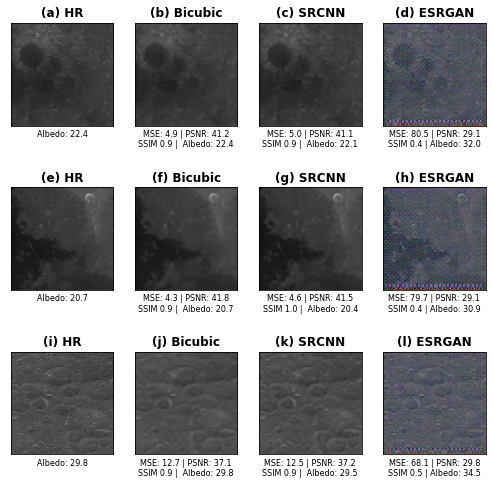

In [53]:
import numpy as np
import math
from skimage import io
from skimage.measure import compare_ssim
import matplotlib.pyplot as plt
import PIL.Image

hr_dir = '/home/alice/alice/masters_project/MoonSRCNN-master/dataset2/validation/'
bic_dir = '/home/alice/alice/masters_project/MoonSRCNN-master/dataset2/val_bic/'
sr_dir = '/home/alice/alice/masters_project/MoonSRCNN-master/dataset2/val_sr/'
esr_dir = '/home/alice/alice/masters_project/MoonSRCNN-master/dataset2/val_esr/'

dest_dir = '/home/alice/alice/masters_project/MoonSRCNN-master/outputs/'


sample_img = ['0011_hr.png', '0006_hr.png', '0017_hr.png']

def calc_mse(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    return mse

def calc_psnr(img1, img2):

    m = calc_mse(img1, img2)
    if m == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(m))

def calc_ssim(img1, img2):
    s = compare_ssim(img1, img2, multichannel=True)
    return s

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def calc_albedo(img):
    img = rgb2gray(img)/255 * 100
    return np.mean(img)

fig, axes = plt.subplots(3,4, figsize=(7,7))

letters = ['a','b','c','d','e','f','g','h','i','j','k','l']

for i,f in enumerate(sample_img):
   
    image_sr = io.imread(sr_dir + 'sr_'+ f)
    image_hr = io.imread(hr_dir + f)
    image_bic = io.imread(bic_dir + f.replace('.png', '_lr.png'))
    #image_esr = io.imread(esr_dir + f)
    image_esr = np.asarray(PIL.Image.open(esr_dir + f).convert('RGBA'))
    ax = axes[i,0]

  
    ax.set_title('({:s}) HR'.format(letters[i*4]), fontweight="bold")
    
    albedo = calc_albedo(image_hr)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image_hr)

    ax.set_xlabel('Albedo: {:.1f}'
                .format(albedo), fontsize=8)



    ax = axes[i,1]
    ax.set_title('({:s}) Bicubic'.format(letters[i*4+1]), fontweight="bold")
    albedo = calc_albedo(image_bic)
    mse = calc_mse(image_hr, image_bic)
    psnr = calc_psnr(image_hr, image_bic)
    ssim = calc_ssim(image_hr, image_bic)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image_bic)

    ax.set_xlabel('MSE: {:.1f} | PSNR: {:.1f}'
                '\nSSIM {:.1f} |  Albedo: {:.1f}'
                .format(mse, psnr, ssim, albedo), fontsize=8)



    ax = axes[i,2]
    ax.set_title('({:s}) SRCNN'.format(letters[i*4+2]), fontweight="bold")
    albedo = calc_albedo(image_sr)
    mse = calc_mse(image_hr, image_sr)
    psnr = calc_psnr(image_hr, image_sr)
    ssim = calc_ssim(image_hr, image_sr)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image_sr)

    ax.set_xlabel('MSE: {:.1f} | PSNR: {:.1f}'
                '\nSSIM {:.1f} |  Albedo: {:.1f}'
                .format(mse, psnr, ssim, albedo), fontsize=8)

    ax = axes[i,3]
    ax.set_title('({:s}) ESRGAN'.format(letters[i*4+3]), fontweight="bold")
    albedo = calc_albedo(image_esr)
    mse = calc_mse(image_hr, image_esr)
    psnr = calc_psnr(image_hr, image_esr)
    ssim = calc_ssim(image_hr, image_esr)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image_esr)

    ax.set_xlabel('MSE: {:.1f} | PSNR: {:.1f}'
                '\nSSIM {:.1f} | Albedo: {:.1f}'
                .format(mse, psnr, ssim, albedo), fontsize=8)

fig.tight_layout()
fig.savefig(dest_dir+'comparisons_with_esrgan.png', dpi=1000)



In [13]:
import numpy as np
import math
from skimage import io
from skimage.measure import compare_ssim
import matplotlib.pyplot as plt
import PIL.Image

hr_dir = '/home/alice/alice/masters_project/MoonSRCNN-master/dataset2/validation/'
bic_dir = '/home/alice/alice/masters_project/MoonSRCNN-master/dataset2/val_bic/'
sr_dir = '/home/alice/alice/masters_project/MoonSRCNN-master/dataset2/val_sr/'
esr_dir = '/home/alice/alice/masters_project/MoonSRCNN-master/dataset2/val_esr/'

dest_dir = '/home/alice/alice/masters_project/MoonSRCNN-master/outputs/'

samples = os.listdir(hr_dir)

def calc_mse(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    return mse

def calc_psnr(img1, img2):

    m = calc_mse(img1, img2)
    if m == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(m))

def calc_ssim(img1, img2):
    s = compare_ssim(img1, img2, multichannel=True)
    return s

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def calc_albedo(img):
    img = rgb2gray(img)/255 * 100
    return np.mean(img)

letters = ['a','b','c','d','e','f','g','h','i','j','k','l']

albedo_hrs = []
albedo_bics = []
albedo_srs = []
albedo_esrs = []
mse_bics = []
mse_srs = []
mse_esrs = []
psnr_bics = []
psnr_srs = []
psnr_esrs = []
ssim_bics = []
ssim_srs = []
ssim_esrs = []

for i,f in enumerate(samples):
   
    image_sr = io.imread(sr_dir + 'sr_'+ f)
    image_hr = io.imread(hr_dir + f)
    image_bic = io.imread(bic_dir + f.replace('.png', '_lr.png'))
    image_esr = np.asarray(PIL.Image.open(esr_dir + f).convert('RGBA'))


    albedo = calc_albedo(image_hr)
    albedo_hrs.append(albedo)

    albedo = calc_albedo(image_bic)
    mse = calc_mse(image_hr, image_bic)
    psnr = calc_psnr(image_hr, image_bic)
    ssim = calc_ssim(image_hr, image_bic)
    albedo_bics.append(albedo)
    mse_bics.append(mse)
    psnr_bics.append(psnr)
    ssim_bics.append(ssim)

    albedo = calc_albedo(image_sr)
    mse = calc_mse(image_hr, image_sr)
    psnr = calc_psnr(image_hr, image_sr)
    ssim = calc_ssim(image_hr, image_sr)
    albedo_srs.append(albedo)
    mse_srs.append(mse)
    psnr_srs.append(psnr)
    ssim_srs.append(ssim)


    albedo = calc_albedo(image_esr)
    mse = calc_mse(image_hr, image_esr)
    psnr = calc_psnr(image_hr, image_esr)
    ssim = calc_ssim(image_hr, image_esr)
    albedo_esrs.append(albedo)
    mse_esrs.append(mse)
    psnr_esrs.append(psnr)
    ssim_esrs.append(ssim)

print('Albedo: \nHR {:.3f} +/- {:.3f} | BICUBIC  {:.3f} +/- {:.3f} | \nSRCNN  {:.3f} +/- {:.3f} | ESRGAN {:.3f} +/- {:.3f} | '.format(np.mean(albedo_hrs), np.std(albedo_hrs), np.mean(albedo_bics), np.std(albedo_bics), np.mean(albedo_srs), np.std(albedo_srs), np.mean(albedo_esrs), np.std(albedo_esrs),
))
print('MSE: \nBICUBIC  {:.3f} +/- {:.3f} | SRCNN  {:.3f} +/- {:.3f} | ESRGAN {:.3f} +/- {:.3f} | '.format(np.mean(mse_bics), np.std(mse_bics), np.mean(mse_srs), np.std(mse_srs), np.mean(mse_esrs), np.std(mse_esrs)
))
print('PSNR: \nBICUBIC  {:.3f} +/- {:.3f} | SRCNN  {:.3f} +/- {:.3f} | ESRGAN {:.3f} +/- {:.3f} | '.format(np.mean(psnr_bics), np.std(psnr_bics), np.mean(psnr_srs), np.std(psnr_srs), np.mean(psnr_esrs), np.std(psnr_esrs)
))
print('SSIM: \nBICUBIC  {:.3f} +/- {:.3f} | SRCNN  {:.3f} +/- {:.3f} | ESRGAN {:.3f} +/- {:.3f} | '.format(np.mean(ssim_bics),  np.std(ssim_bics), np.mean(ssim_srs),  np.std(ssim_srs), np.mean(ssim_esrs), np.std(ssim_esrs)
))


Albedo: 
HR 24.291 +/- 6.150 | BICUBIC  24.293 +/- 6.151 | 
SRCNN  24.039 +/- 6.110 | ESRGAN 32.305 +/- 2.590 | 
MSE: 
BICUBIC  6.334 +/- 3.247 | SRCNN  6.439 +/- 3.091 | ESRGAN 74.945 +/- 8.207 | 
PSNR: 
BICUBIC  40.691 +/- 2.274 | SRCNN  40.542 +/- 2.105 | ESRGAN 29.412 +/- 0.514 | 
SSIM: 
BICUBIC  0.929 +/- 0.028 | SRCNN  0.933 +/- 0.026 | ESRGAN 0.463 +/- 0.070 | 


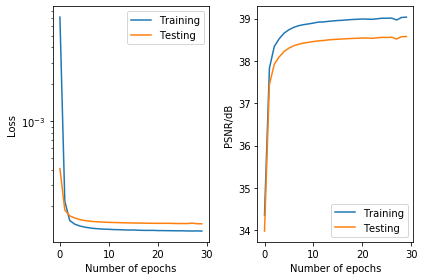

In [39]:
import pandas as pd
df = pd.read_csv('/home/alice/alice/masters_project/MoonSRCNN-master/outputs/df_30e_64arch_Adam_MSE_0001lr.csv')

num_epochs = 30
f, (loss, psnr) = plt.subplots(1, 2, sharex=True)
loss.set_ylabel("Loss")
loss.set_xlabel("Number of epochs")
# psnr.set_title("PSNR per epoch")
psnr.set_ylabel("PSNR/dB")
psnr.set_xlabel("Number of epochs")
loss.semilogy(np.arange(0,num_epochs), df['trainingLoss'], label='Training') # took out the minus 40 from the training loss
loss.semilogy(np.arange(0,num_epochs),df['testingLoss'], label='Testing') # took out the minus 40 from the training loss
loss.legend()
psnr.plot(np.arange(0,num_epochs), df['trainingPSNR'], label='Training')
psnr.plot(np.arange(0,num_epochs), df['testingPSNR'], label='Testing')
psnr.legend()
f.tight_layout() # this and the following line hopefully solves the overlap issue.
plt.savefig('../outputs/metrics_30e_64arch_Adam_MSE_0001lr_log.png', dpi=100)
# plt.show(block=False)
